# Fourth Order Runge-Kutta

We wish to approximate the solution to a first order differential equation given by:

$y^{'} = f(x, y)$

$y(x_0) = y_0$

We will use the following slope approximations to estimate the slope at some time $x_0$ (assuming we only have an approximation to $y(x_0)$).

$$k_1 = hf(x_n, y_n)$$

$$k_2 = hf(x_n +h/2, y_n +k_{1}/2 )$$

$$k_3 = hf(x_n +h/2, y_n +k_{2}/2)$$

$$k_4 = hf(x_n + h, y_n + k3)$$

$x_{n+1} = x_n + h$

$y_{n+1} = y_n +k_{1}/6 +k_2/{3} +k_{3}/3 +k_{4}/6$




In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib notebook



In [8]:
x = sp.symbols('x')
y = sp.symbols('y')

In [9]:
def rk4(x0,y0,function,h,n):
   
    f = sp.lambdify((x,y),function,'numpy')
    
    X_vector = [x0]
    Y_vector = [y0]
    
    print('x0 =',x0, '','y0 =',y0)

    
    k1 = h*f(x0,x0)
    k2 = h*f(x0 + h/2, y0 + k1/2)
    k3 = h*f(x0 + h/2, y0 + k2/2)
    k4 = h*f(x0 + h, y0 + k3)
    
    for i in range(1,n+1):
        
        X = x0 + h

        k1 = h*f(x0,x0)
        k2 = h*f(x0 + h/2, y0 + k1/2)
        k3 = h*f(x0 + h/2, y0 + k2/2)
        k4 = h*f(x0 + h, y0 + k3)
        
        Y = y0 + k1/6 + k2/3 + k3/3 + k4/6
        
        x0 = X
        y0 = Y
        
        X_vector.append(X)
        Y_vector.append(Y) #approximate y values
        
        print('x' + str(i) + '=',round(X,6),'', 'y' + str(i) + '=', round(Y,6))
        
    fig = plt.figure()
    ax = plt.axes()
        
    plt.plot(X_vector, Y_vector, 'bo-', label = 'rk4')
        
    xt = np.linspace(0,10,15)
        
    exact = -1*x + 1 - sp.exp(x) #exact solution to differential equation
        
    g = sp.lambdify(x,exact, 'numpy') 
    
    plt.plot(xt,g(xt), label = str(exact))
        
    plt.legend(loc = 'upper right')
    plt.title('RK4 Method')
    plt.show()
        
    
    

x0 = 0  y0 = 0
x1= 0.5  y1= -0.148438
x2= 1.0  y2= -0.627848
x3= 1.5  y3= -1.607167
x4= 2.0  y4= -3.341554
x5= 2.5  y5= -6.21641
x6= 3.0  y6= -10.813848
x7= 3.5  y7= -18.013103
x8= 4.0  y8= -29.142187
x9= 4.5  y9= -46.20695
x10= 5.0  y10= -72.237059
x11= 5.5  y11= -111.808579
x12= 6.0  y12= -171.833271
x13= 6.5  y13= -262.750773
x14= 7.0  y14= -400.329293
x15= 7.5  y15= -608.38539
x16= 8.0  y16= -922.891996
x17= 8.5  y17= -1398.183223
x18= 9.0  y18= -2116.326222
x19= 9.5  y19= -3201.276585
x20= 10.0  y20= -4840.258904


<IPython.core.display.Javascript object>


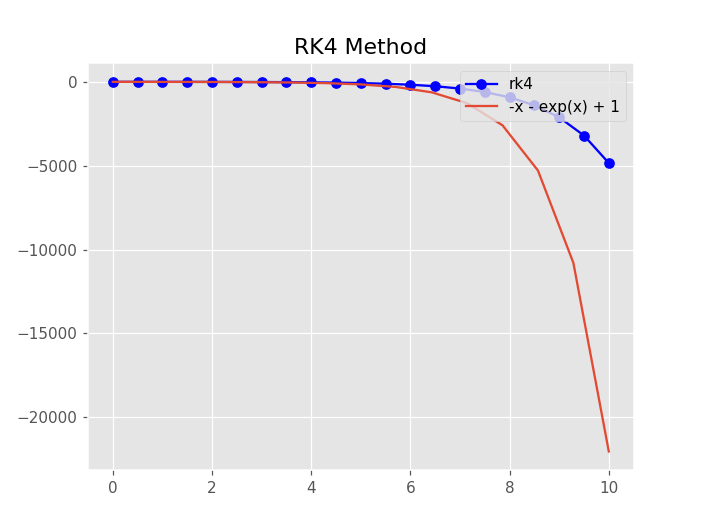

In [10]:
##testing method on function = y-x, x0 = 0, y0 = 0, h = .50 and n = 20
function = y-x
rk4(0,0,function,.50,20)